# Sequence to Sequence Analysis With LSTM
## Case Study: Tourist Arrival in Lombok
*Ahmad Ashril Rizal*

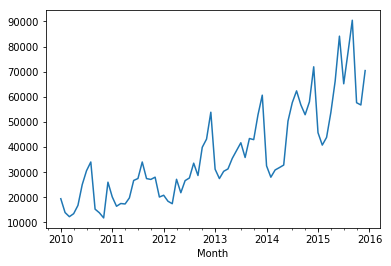

In [5]:
# load and plot dataset
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
# load dataset
def parser(x):
    return datetime.strptime(''+x, '%Y-%m')
series = read_csv('TouristArrivals.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# line plot
series.plot()
pyplot.show()

# Data Preparation and Model Evaluation

## Data Split

70% dari dataset akan diambil sebagai data training dan 30% dari dataset adalah data testing. Model akan dikembangkan dengan menggunakan dataset pelatihan dan akan membuat prediksi pada dataset tes. Sebagai referensi, beberapa pengamatan terakhir adalah sebagai berikut:

In [6]:
print(series.head())

Month
2010-01-01    19435
2010-02-01    13931
2010-03-01    12292
2010-04-01    13483
2010-05-01    16781
Name: #TouristArrivals, dtype: int64


## Sequence to sequence Forecast
   Dari dataset akan dibuat prediksi dengan merancang dataset menjadi sliding window atau sequence to sequence. Untuk bulan tertentu dalam 12 bulan terakhir kumpulan data, akan dibuat time step dalam kurun waktu 3 bulan. Atau dengan kata lain, diberikan pengamatan historis (t-1, t-2, ... t-n) ramalan t, t + 1 dan t + 2.
   Secara spesifik, untuk meramalkan kondisi di bulan April 2018, akan diramalkan dengan data Januari, Februari dan Maret. Untuk bulan Mei, diramalakan dengan data pada bulan Februari, Maret dan April

Sebagai contoh 10 prakiraan dengan data 3 bulan sebelumnya, sebagai berikut:

In [2]:
# convert time series into supervised learning problem
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [10]:
# transform series into train and test sets for supervised learning
def prepare_data(series, n_test, n_lag, n_seq):
	# extract raw values
	raw_values = series.values
	raw_values = raw_values.reshape(len(raw_values), 1)
	# transform into supervised learning problem X, y
	supervised = series_to_supervised(raw_values, n_lag, n_seq)
	supervised_values = supervised.values
	# split into train and test sets
	train, test = supervised_values[0:-n_test], supervised_values[-n_test:]
	return train, test

In [12]:
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from pandas import datetime

# date-time parsing function for loading the dataset
def parser(x):
	return datetime.strptime(''+x, '%Y-%m')

# convert time series into supervised learning problem
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# transform series into train and test sets for supervised learning
def prepare_data(series, n_test, n_lag, n_seq):
	# extract raw values
	raw_values = series.values
	raw_values = raw_values.reshape(len(raw_values), 1)
	# transform into supervised learning problem X, y
	supervised = series_to_supervised(raw_values, n_lag, n_seq)
	supervised_values = supervised.values
	# split into train and test sets
	train, test = supervised_values[0:-n_test], supervised_values[-n_test:]
	return train, test

# load dataset
series = read_csv('TouristArrivals.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# configure
n_lag = 1
n_seq = 3
n_test = 10
# prepare data
train, test = prepare_data(series, n_test, n_lag, n_seq)
print(test)
print('Train: %s, Test: %s' % (train.shape, test.shape))

[[71930. 45715. 40774. 43845.]
 [45715. 40774. 43845. 53764.]
 [40774. 43845. 53764. 66190.]
 [43845. 53764. 66190. 84118.]
 [53764. 66190. 84118. 65172.]
 [66190. 84118. 65172. 77667.]
 [84118. 65172. 77667. 90449.]
 [65172. 77667. 90449. 57639.]
 [77667. 90449. 57639. 56733.]
 [90449. 57639. 56733. 70420.]]
Train: (59, 4), Test: (10, 4)
